In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [13]:
#import libs to resize and read files
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
##############################
#Resized with a sample
##############################
# read image
img = cv2.imread("C:/temp/AR_out/m-001-1.raw.jpg", cv2.IMREAD_UNCHANGED)

#original dimension
print('Original Dimensions : ',img.shape)

# scale
scale_percent = 5 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dimension = (width, height)

# resize image
resized = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (576, 768, 3)
Resized Dimensions :  (28, 38, 3)


In [11]:
##############################
#save resized image
##############################
cv2.imwrite("C:/temp/AR_out_resize/output.jpg", resized)

True

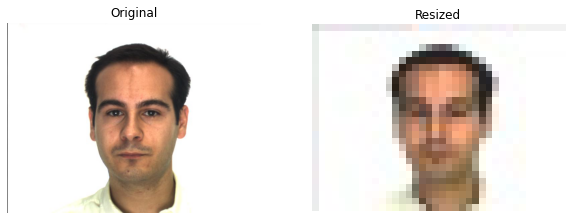

In [14]:
#######################################
#Show original and resized image
#######################################
original_image = Image.open("C:/temp/AR_out/m-001-1.raw.jpg")
resized_image = Image.open("C:/temp/AR_out_resized/output.jpg")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#original image
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[0].axis('off')  # Hide the axes

#resized image
axs[1].imshow(resized_image)
axs[1].set_title('Resized')
axs[1].axis('off')  # Hide the axes

# Show the figure
plt.show()

In [23]:
from pathlib import Path

In [21]:
#######################################
# List all files in the folder
#######################################
files = [f for f in os.listdir("C:/temp/AR_out") if os.path.isfile(os.path.join("C:/temp/AR_out", f))]

In [29]:
#######################################
# Set Scale
#######################################
scale_percent = 5 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dimension = (width, height)

In [30]:
#######################################
# List all files in the folder
#######################################
files_x = list(map(str, filter(lambda file: file.is_file(), Path("C:/temp/AR_out").rglob('*'))))

In [31]:
files_x

['C:\\temp\\AR_out\\m-001-1.raw.jpg',
 'C:\\temp\\AR_out\\m-001-10.raw.jpg',
 'C:\\temp\\AR_out\\m-001-11.raw.jpg',
 'C:\\temp\\AR_out\\m-001-12.raw.jpg',
 'C:\\temp\\AR_out\\m-001-13.raw.jpg',
 'C:\\temp\\AR_out\\m-001-14.raw.jpg',
 'C:\\temp\\AR_out\\m-001-15.raw.jpg',
 'C:\\temp\\AR_out\\m-001-16.raw.jpg',
 'C:\\temp\\AR_out\\m-001-17.raw.jpg',
 'C:\\temp\\AR_out\\m-001-18.raw.jpg',
 'C:\\temp\\AR_out\\m-001-19.raw.jpg',
 'C:\\temp\\AR_out\\m-001-2.raw.jpg',
 'C:\\temp\\AR_out\\m-001-20.raw.jpg',
 'C:\\temp\\AR_out\\m-001-21.raw.jpg',
 'C:\\temp\\AR_out\\m-001-22.raw.jpg',
 'C:\\temp\\AR_out\\m-001-23.raw.jpg',
 'C:\\temp\\AR_out\\m-001-24.raw.jpg',
 'C:\\temp\\AR_out\\m-001-25.raw.jpg',
 'C:\\temp\\AR_out\\m-001-26.raw.jpg',
 'C:\\temp\\AR_out\\m-001-3.raw.jpg',
 'C:\\temp\\AR_out\\m-001-4.raw.jpg',
 'C:\\temp\\AR_out\\m-001-5.raw.jpg',
 'C:\\temp\\AR_out\\m-001-6.raw.jpg',
 'C:\\temp\\AR_out\\m-001-7.raw.jpg',
 'C:\\temp\\AR_out\\m-001-8.raw.jpg',
 'C:\\temp\\AR_out\\m-001-9.raw.j

In [41]:
image_resized_list = []
#######################################
# resize all files
#######################################
for file in files_x:
    #file_path = "../AR_out/" & file
    # Read the image using cv2.imread
    #img = cv2.imread(str.join("../AR_out/",file), cv2.IMREAD_UNCHANGED)
    # read image
    img = cv2.imread(file, cv2.IMREAD_UNCHANGED)

    # resize image
    resized = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)

    #save an array
    image_resized_list.append(resized)
 

In [45]:
# Convert the list to a numpy array
image_resized_array = np.array(image_resized_list)

# Get the number of images and the dimensions of each image
num_images, height, width, num_channels = image_resized_array.shape

# Reshape the array into a 2D array where each row is a vectorized image
data_2d = image_resized_array.reshape(num_images, -1)  # -1 is a placeholder that tells numpy to compute the size of this dimension

In [46]:
mean_vector = np.mean(data_2d, axis=0)

In [48]:
# Center the data by subtracting the mean
centered_data = data_2d - mean_vector

In [49]:
covariance_matrix = np.dot(centered_data.T, centered_data) / (num_images - 1)

In [50]:
covariance_matrix = np.cov(data_2d, rowvar=False)


In [51]:
# Print the covariance matrix to the console
print(covariance_matrix)

[[ 95.23616651  93.95031135  39.84189794 ...  10.26364234  11.28963846
   11.06107942]
 [ 93.95031135  98.47033063  39.44800886 ...  11.48505404  11.82044728
   12.48844201]
 [ 39.84189794  39.44800886  33.56664309 ...   6.59279432   6.15577681
    6.72842623]
 ...
 [ 10.26364234  11.48505404   6.59279432 ... 403.70437624 377.34680177
  375.17780703]
 [ 11.28963846  11.82044728   6.15577681 ... 377.34680177 361.31993945
  360.61286357]
 [ 11.06107942  12.48844201   6.72842623 ... 375.17780703 360.61286357
  366.30056008]]


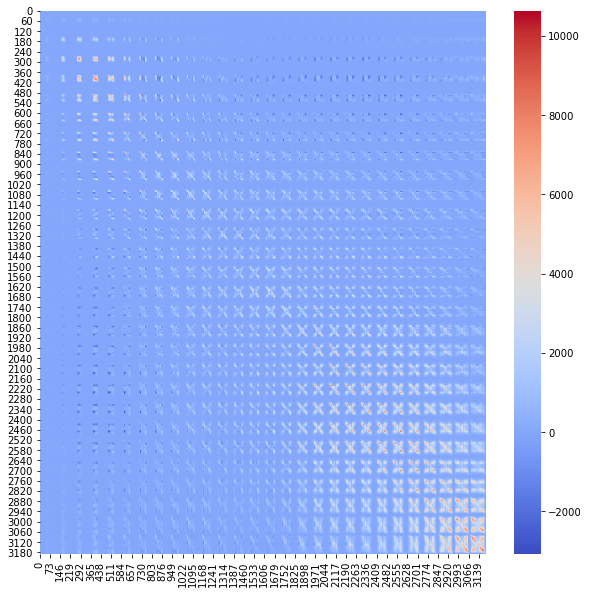

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for better visualization

# Display a heatmap of the covariance matrix
plt.figure(figsize=(10, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', fmt='.2f')
plt.show()

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [54]:
# Get the indices that would sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort the eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Now, sorted_eigenvalues contains the eigenvalues in descending order,
# and sorted_eigenvectors contains the corresponding eigenvectors.

# To show the largest eigenvalues, simply print the first few values
# of sorted_eigenvalues. For example, to show the largest 10 eigenvalues:

num_to_show = 10
print(f'The largest {num_to_show} eigenvalues are:')
print(sorted_eigenvalues[:num_to_show])

The largest 10 eigenvalues are:
[1901826.09210112+0.j  838883.21684105+0.j  650359.36891147+0.j
  604969.18591493+0.j  563612.62241698+0.j  336225.90136539+0.j
  285634.48323012+0.j  201181.28178278+0.j  158007.28615751+0.j
  148437.7536348 +0.j]


In [ ]:
13K POR 3K, MATRIZ DE COVARIANZA, VETORES PROPRIOS E VALORES PROPRIOS


In [ ]:
PARA FAZER A PROJEÇ]AO FAZER A MEDIA DE TODAS AS DIMENSOES

In [ ]:
DIMENSOES 

FAZER NVCUM SUM

TRAZ O VETOR 